In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Customer-churn-unclean-data.csv")
print(df.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [2]:
print(df.describe())
print(df.info())
print(df.isna())
print(df.isna().sum())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines  

In [3]:
print(df.duplicated())
print(df.duplicated().sum())

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool
0


In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'].isna().sum())



11


In [5]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


C:\Users\furqa\AppData\Local\Temp\ipykernel_18456\419782261.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [6]:
df['Churn'].value_counts()
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

<Axes: xlabel='Churn', ylabel='count'>

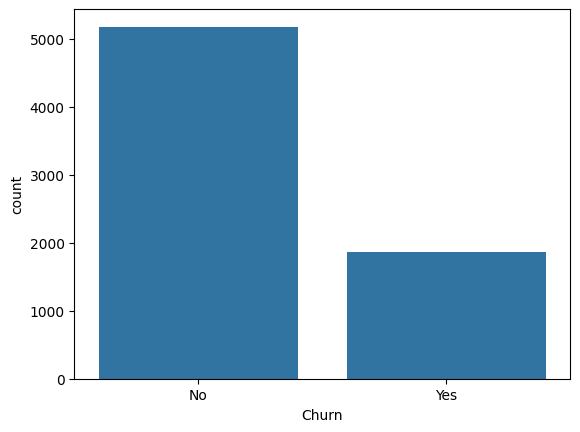

In [7]:
sns.countplot(x='Churn', data=df)

In [ ]:
df[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

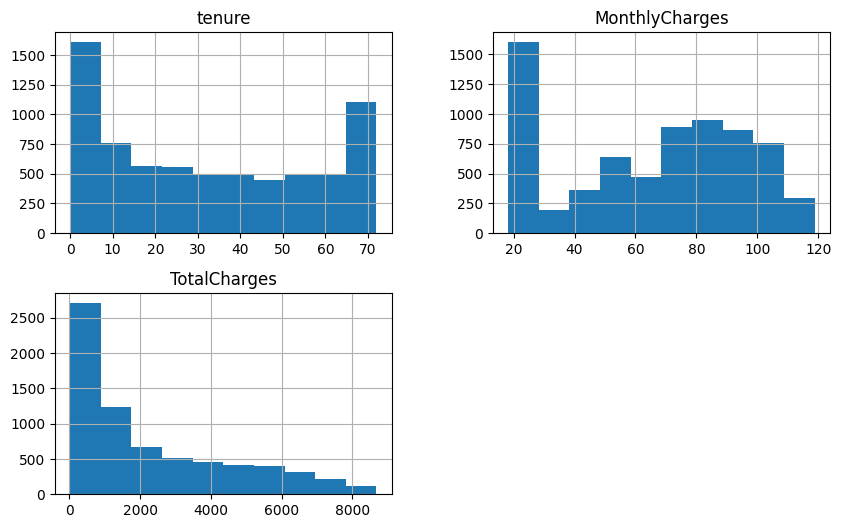

In [ ]:
df.hist(column=['tenure','MonthlyCharges','TotalCharges'], figsize=(10,6))

In [10]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [11]:
cat_cols = cat_cols.drop('customerID')

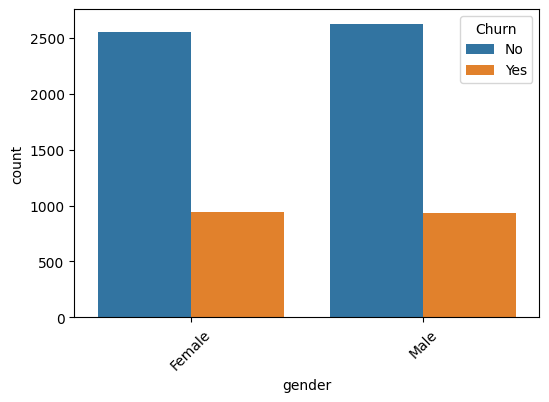

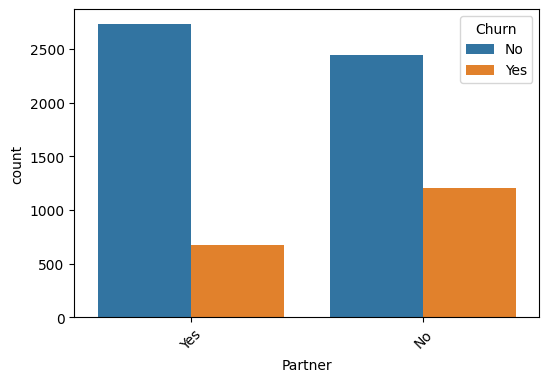

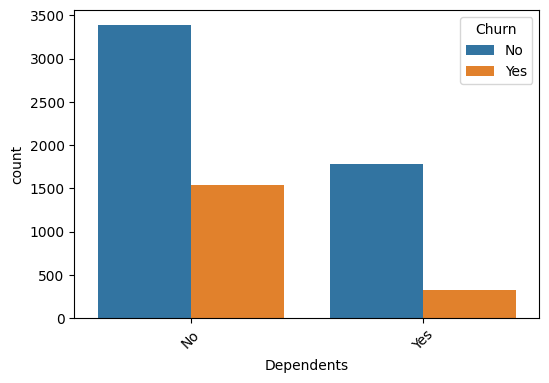

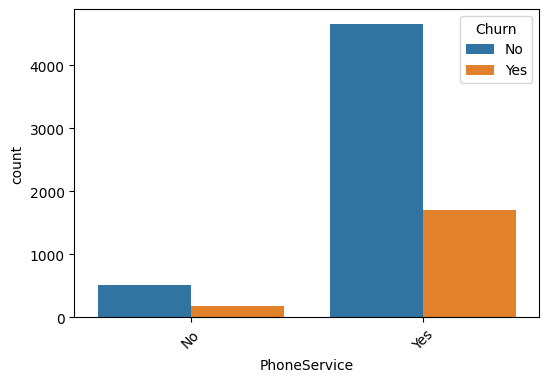

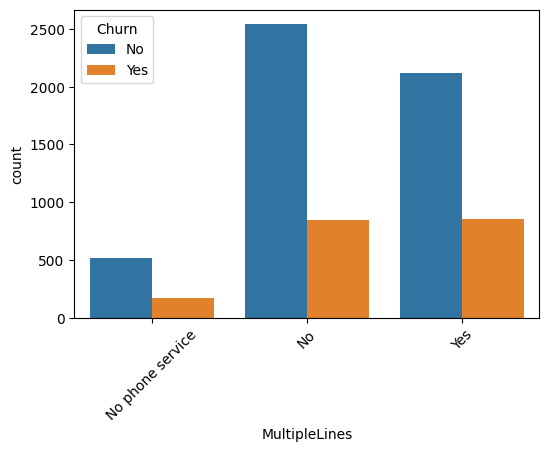

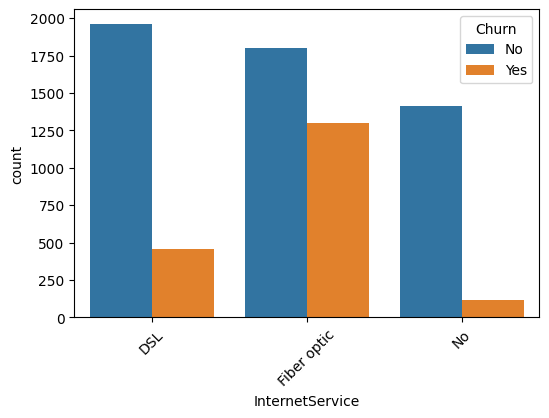

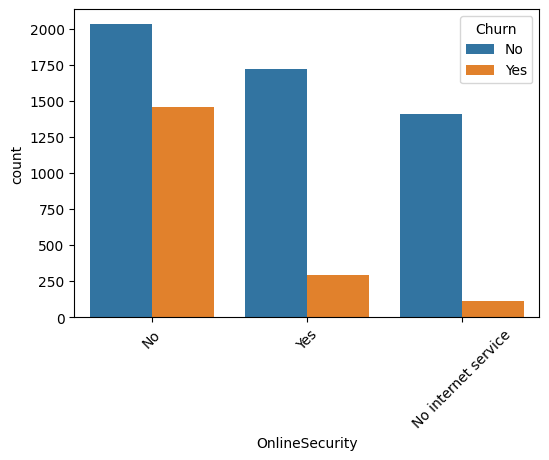

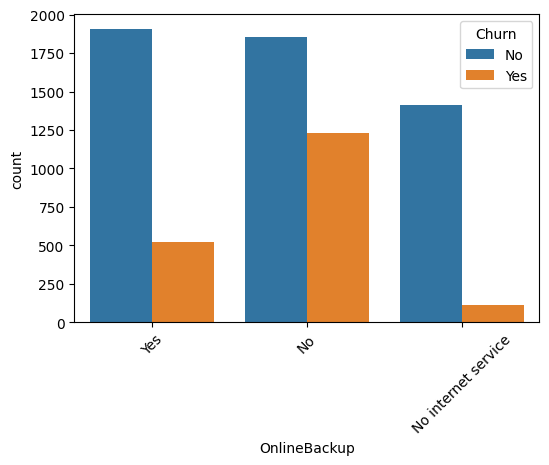

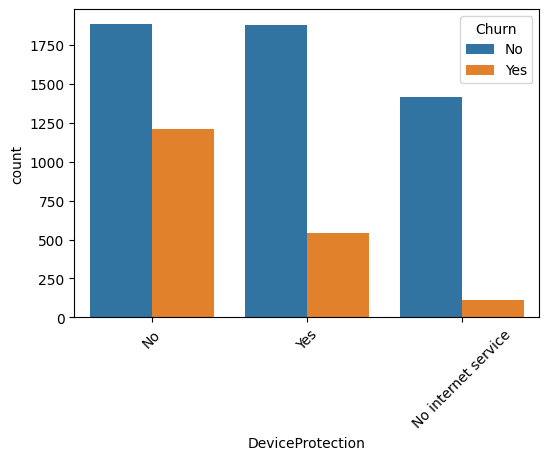

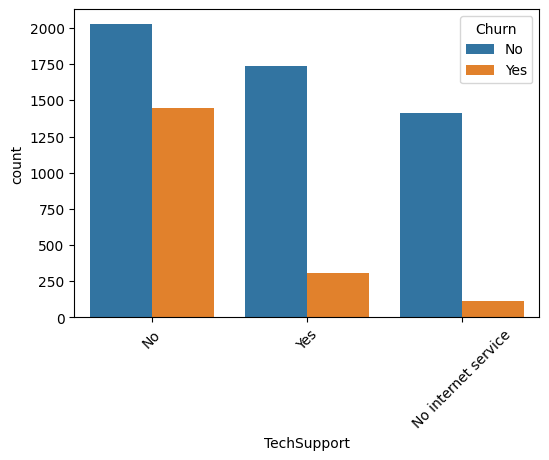

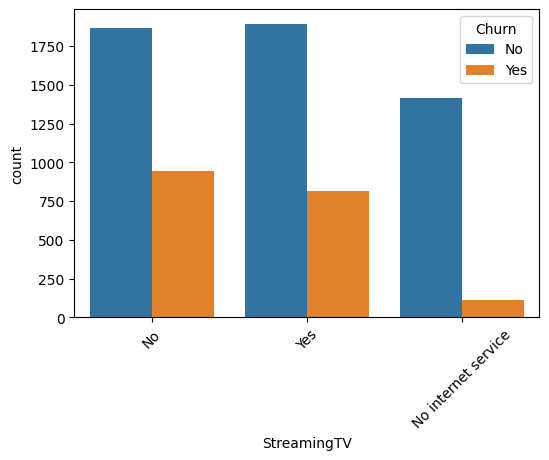

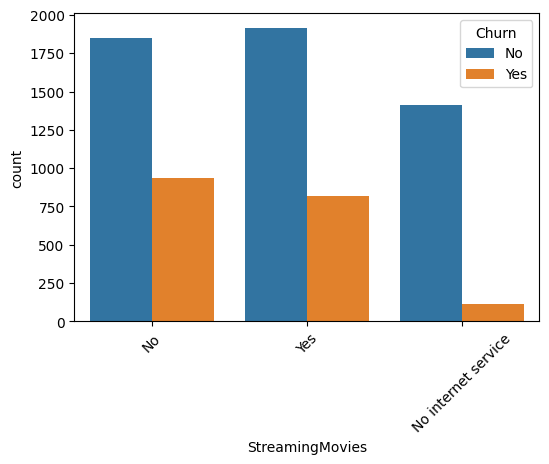

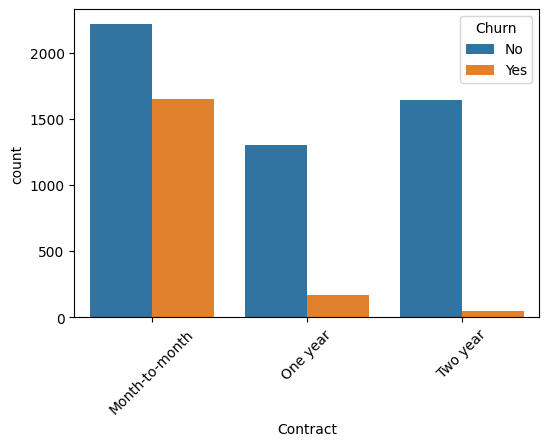

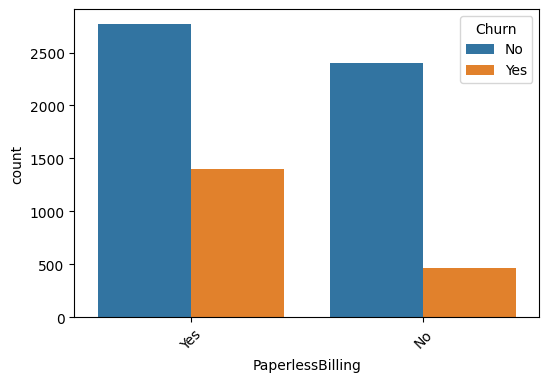

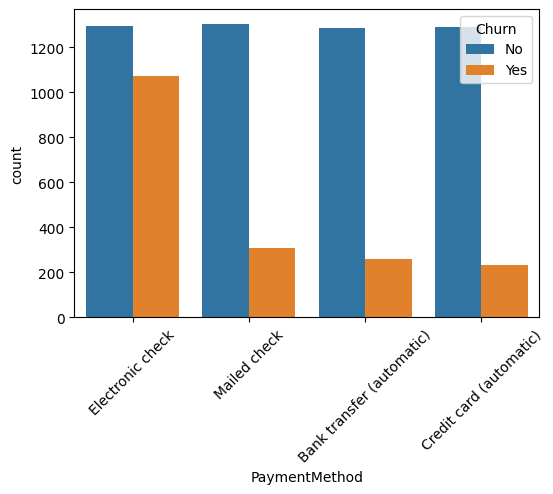

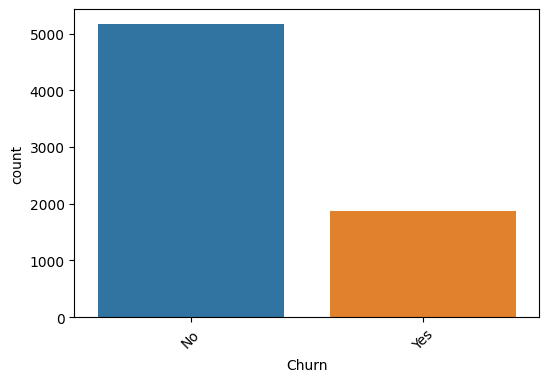

In [12]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.xticks(rotation=45)
    plt.show()


<Axes: xlabel='tenure', ylabel='Count'>

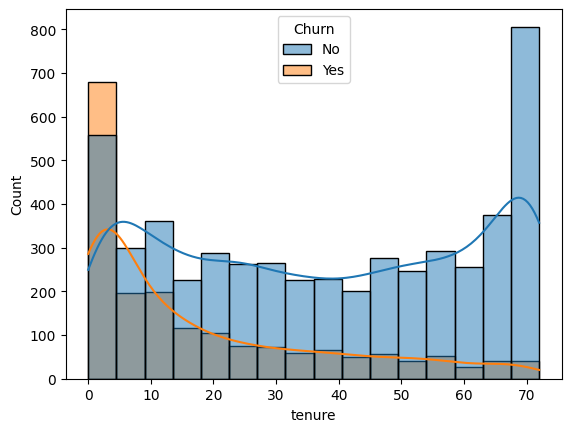

In [13]:
sns.histplot(data=df, x='tenure', hue='Churn', kde=True)


<Axes: xlabel='MonthlyCharges', ylabel='Count'>

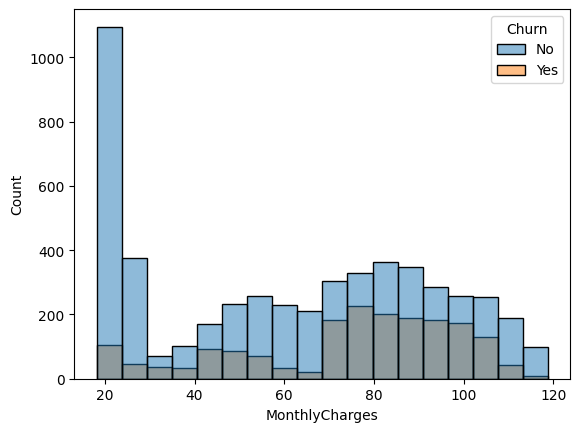

In [14]:
sns.histplot(data=df, x='MonthlyCharges', hue='Churn')


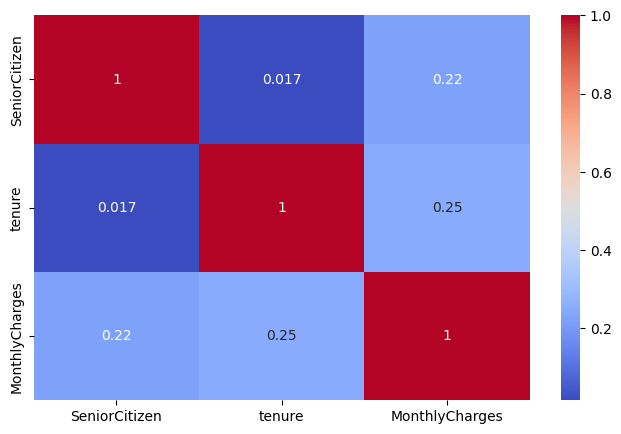

In [20]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [22]:

df.to_excel("Customer_churn_clean_data.xlsx",index=False)